In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler # 정규화

In [3]:
# 데이터 불러오기 : pima-indians
raw = pd.read_csv('./data/pima-indians-diabetes3.csv')
df = raw.copy()
print(df.shape)
df.head(2)

(768, 9)


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
df.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [4]:
# 독립변수, 종속변수 나누기
X = df.iloc[:, :-1]
y = df.iloc[:, -1] # diabetes

In [5]:
# 정규화하기
scaler = StandardScaler()

# 표준화 : 평균 0, 분산 (표준편차) 1
scaler.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


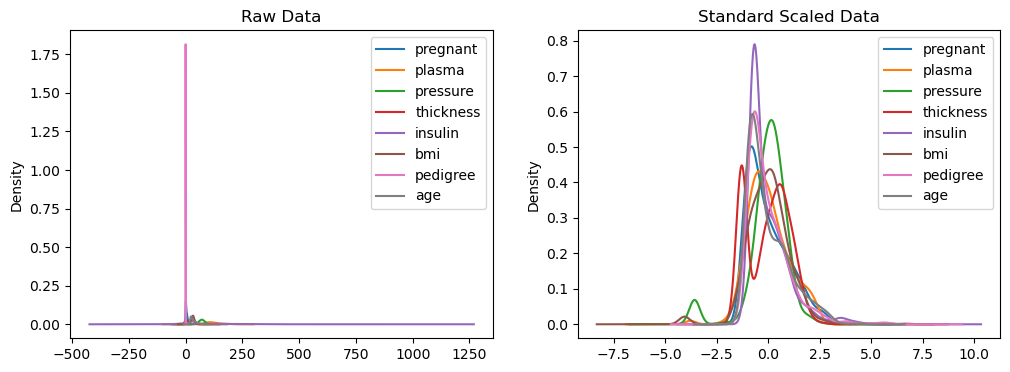

In [7]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

X.plot(kind='kde', title='Raw Data', ax=ax[0])
X_scaled.plot(kind='kde', title='Standard Scaled Data', ax=ax[1])

plt.show()

In [8]:
# 데이터셋 구분 (학습용, 평가용)
X_train, X_test, y_train, t_test = \
train_test_split(X, y, test_size=0.25, random_state=42)

## 의사결정나무

In [10]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
model = DecisionTreeClassifier()

# 학습 실행
model.fit(X_train, y_train)

# test data에 적용하기
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 71.88%
Std : 6.82%


## 랜덤 포레스트 (RandomForest)

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
model = RandomForestClassifier(n_estimators=50) # n_estimaters : 몇 개의 결정 트리를 사용할 것인지 결정하는 옵션

# 모델 fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 77.10%
Std : 6.64%


## 가우시안 나이브 베이즈

In [12]:
from sklearn.naive_bayes import GaussianNB

# 모델 생성
model = GaussianNB()

# 모델 fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 74.67%
Std : 4.89%


## KNN 최근접 이웃 지도학습

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# 모델 fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 73.06%
Std : 5.13%


## 에이다부스트 AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 생성
model = AdaBoostClassifier()

# 모델 fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 74.99%
Std : 2.69%


## 이차 판별 분석

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 모델 생성
model = QuadraticDiscriminantAnalysis()

# 모델 fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 73.64%
Std : 6.10%


## 서포트 벡터 머신 Support Vector Machine

In [9]:
from sklearn.svm import SVC

# 모델 생성
model = SVC(kernel='linear')

# fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 77.26%
Std : 6.18%


## 서포트 벡터 머신 - RBF kernel
* 비선형 (선형으로 분리될 수 없는 경우 사용)

In [16]:
# 모델 생성
model = SVC(kernel='rbf')

# fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 75.86%
Std : 5.34%


## 보팅 Voting

In [18]:
from sklearn.ensemble import VotingClassifier

model1 = AdaBoostClassifier()
model2 = RandomForestClassifier()
model3 = SVC(kernel='linear')

voting = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)])

# fitting
voting.fit(X_train, y_train)

# test data로 예측
y_pred = voting.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=voting, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

Acc : 76.39%
Std : 6.50%


## 배깅

In [17]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)

# fitting
model.fit(X_train, y_train)

# test data로 예측
y_pred = model.predict(X_test)

# 계층별 교차 검증
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도 계산하기
accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold)

# 정확도와 표준편차 출력하기
print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
print('Std : {:.2f}%'.format(accuracy.std() * 100))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

Acc : 76.03%
Std : 5.57%


## 한 번에 끝내는 알고리즘 성능비교

In [20]:
# 사용할 분류기 모두 지정
classifiers = \
[
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    VotingClassifier(
        estimators=[
            ('1', AdaBoostClassifier()),
            ('2', RandomForestClassifier()),
            ('3', SVC(kernel='linear')),
        ]
    ),
    BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10, random_state=42)
]

# 각 분류기의 이름 지정
classifiers_name = \
[
    'dt',
    'rf',
    'gnb',
    'knn',
    'svm_linear',
    'svm_rbf',
    'adaboost',
    'qda',
    'voting',
    'bagging'
]

In [21]:
# 결과가 저장될 리스트
model_accuracy = []
model_means = []
model_names = []

# 각 분류기 실행 >> 결과 저장
classifier_data = zip(classifiers_name, classifiers)

for name, classifier in classifier_data:
    # 계층별 교차 검증
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통한 정확도 계산
    accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=kfold)
    # 정확도 & 표준편차 확인하기
    print('='*10, name, '='*10)
    print('Acc : {:.2f}%'.format(accuracy.mean() * 100))
    print('Std : {:.2f}%'.format(accuracy.std() * 100))
    # 결과 저장
    model_accuracy.append(accuracy)
    model_means.append(accuracy.mean()*100)
    model_names.append(name)

========== dt ==========
Acc : 73.97%
Std : 3.52%
========== rf ==========
Acc : 77.27%
Std : 7.94%
========== gnb ==========
Acc : 75.34%
Std : 3.78%
========== knn ==========
Acc : 73.97%
Std : 3.60%
========== svm_linear ==========
Acc : 77.25%
Std : 4.45%
========== svm_rbf ==========
Acc : 76.58%
Std : 4.89%
========== adaboost ==========
Acc : 75.52%
Std : 4.65%
========== qda ==========
Acc : 72.57%
Std : 4.69%
========== voting ==========
Acc : 76.75%
Std : 3.57%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

========== bagging ==========
Acc : 77.07%
Std : 4.22%


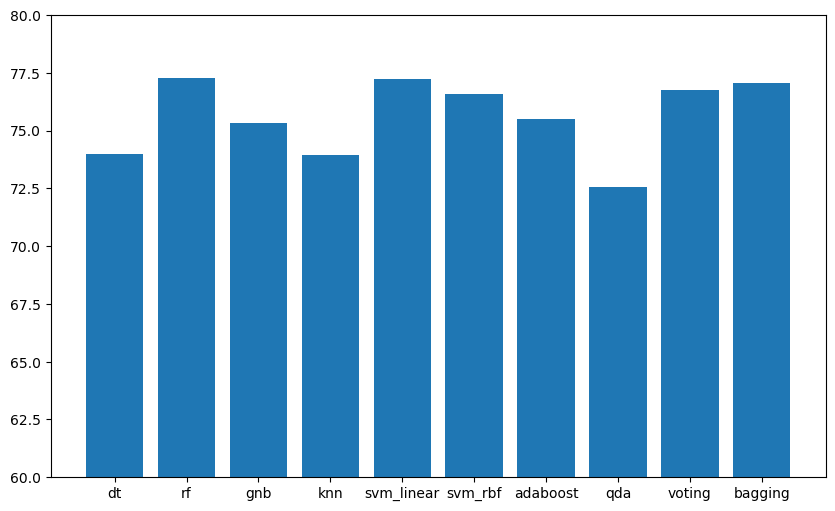

In [22]:
# 각 분류기별 정확도 평균 값을 막대 그래프로 출력하기
plt.figure(figsize=(10, 6))
plt.ylim([60, 80])
plt.bar(model_names, model_means)
plt.show()

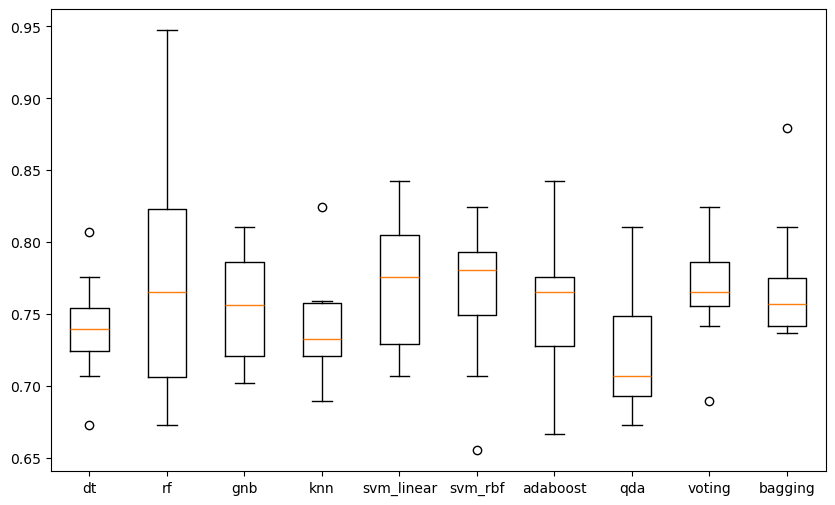

In [23]:
# 각 분류기별 결과값을 boxplot로 출력하기
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.boxplot(model_accuracy)
ax.set_xticklabels(model_names)
plt.show()